In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import numpy as np
from pathlib import Path
from datetime import timedelta

In [2]:
data_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test_40/11158/real_time.csv"
result_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/uno_pi_cc_hnorm_unit_aug/test_40/11158"
result_path = Path(result_path)

In [8]:
flare_path = "/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/11158_goes_flare_list.csv"
flares = pd.read_csv(flare_path)

In [7]:
flares

,event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
0,2011-02-13 17:28:00,2011-02-13 17:38:00,2011-02-13 17:47:00,M6.6,11158
1,2011-02-14 17:20:00,2011-02-14 17:26:00,2011-02-14 17:32:00,M2.2,11158
2,2011-02-15 01:44:00,2011-02-15 01:56:00,2011-02-15 02:06:00,X2.2,11158


In [11]:
peaktime = flares['event_peaktime'].apply(pd.to_datetime)
starttime = flares['event_starttime'].apply(pd.to_datetime)
endtime = flares['event_endtime'].apply(pd.to_datetime)
goescls = flares['fl_goescls']

In [16]:
df = pd.read_csv(data_path)

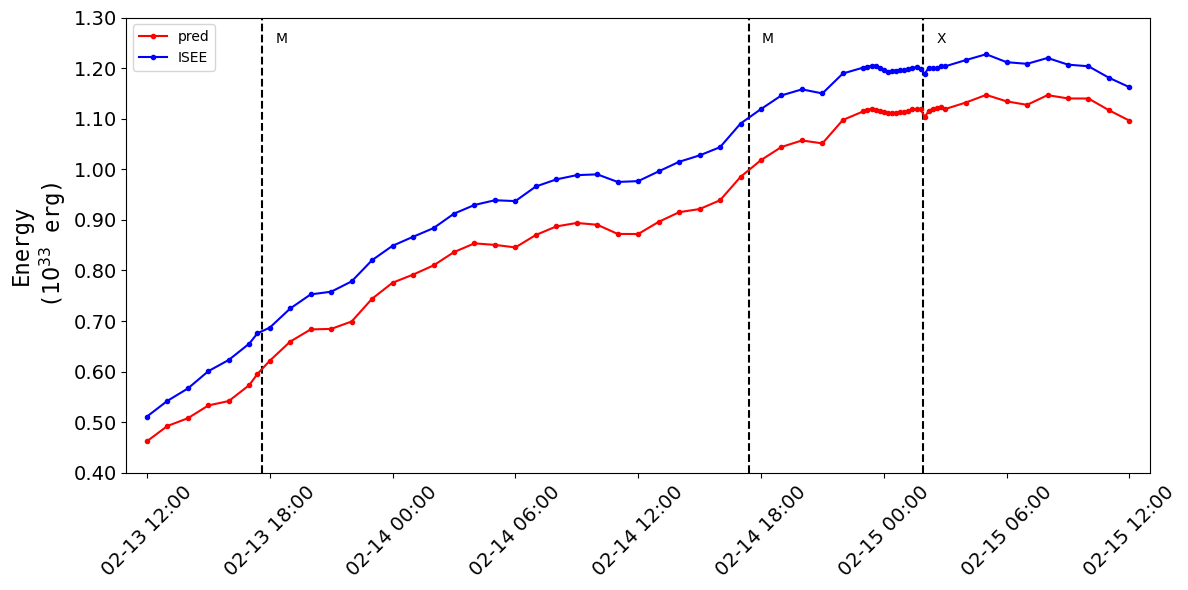

In [25]:
title = "NOAA 11158"
ylim = [0.4, 1.3]

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy.png', dpi=600)

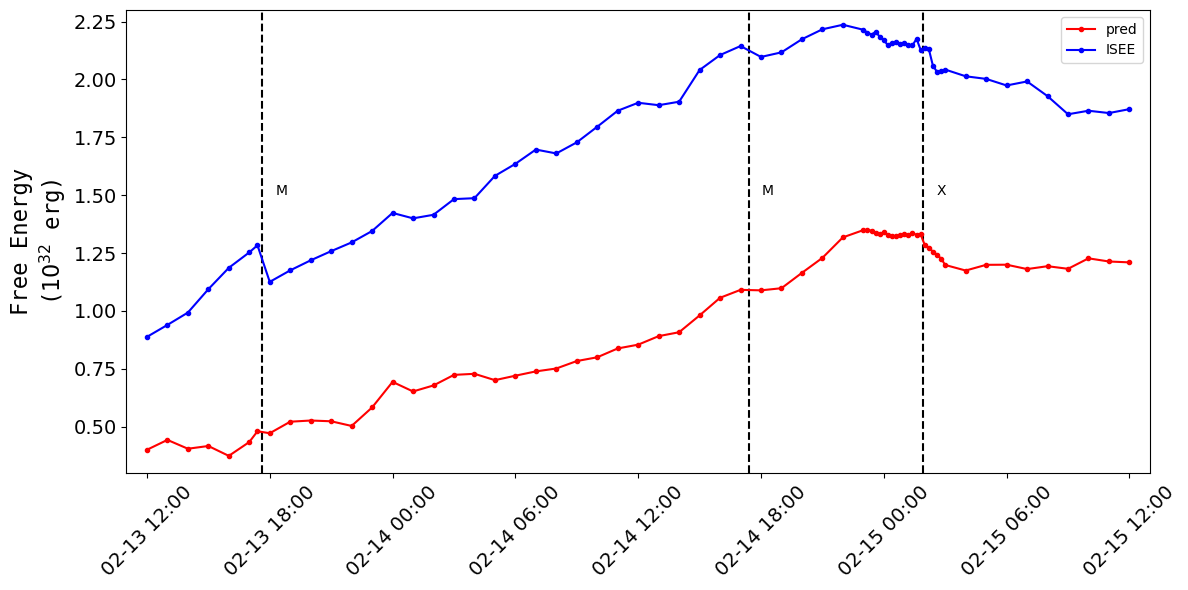

In [27]:
title = "NOAA 11158"
ylim = [0.3, 2.3]

obstime = df['obstime'].apply(pd.to_datetime)
pot_E = df['pot_E_1e33']
pred_free_E = df['pred_E_1e33'] - pot_E
ref_free_E = df['ref_E_1e33'] - pot_E

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=3, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='pred')
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='ISEE')

# format the x-axis with universal time
# locator = mdates.AutoDateLocator()
# locator.intervald[mdates.HOURLY] = [hour] # only show every 3 hours
# formatter = mdates.DateFormatter('%H')
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.HourLocator(interval=6))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag free energy starting at {str(obstime[0])}',**text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.5))
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy.png', dpi=600)

In [29]:
df_lamb_1 = pd.read_csv("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/nf2/paper/res_lambda_1.csv")
df_lamb_01 = pd.read_csv("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/nf2/paper/res_lambda_01.csv")
df_w1 = pd.read_csv("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/nf2/paper/res_w1.csv")
df_w2 = pd.read_csv("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/nf2/paper/res_w2.csv")

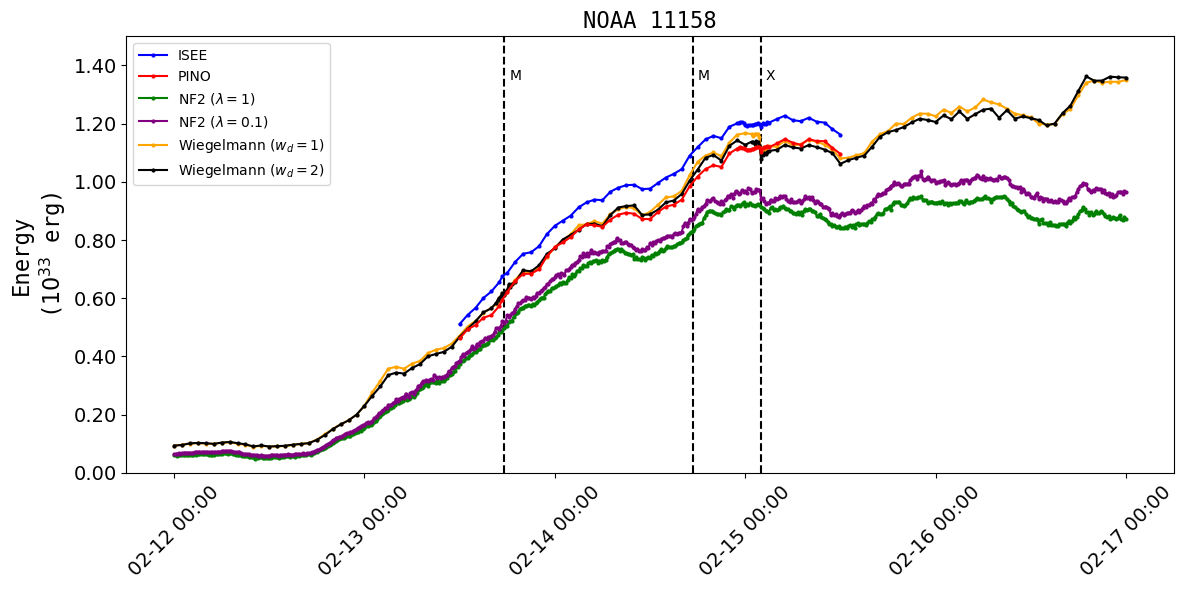

In [31]:
title = "NOAA 11158"
ylim = [0, 1.5]

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

obstime_lamb_1 = df_lamb_1['obstime'].apply(pd.to_datetime)
pred_E_lamb_1 = df_lamb_1['pred_E_1e33']

obstime_lamb_01 = df_lamb_01['obstime'].apply(pd.to_datetime)
pred_E_lamb_01 = df_lamb_01['pred_E_1e33']

obstime_w1 = df_w1['obstime'].apply(pd.to_datetime)
pred_E_w1 = df_w1['pred_E_1e33']

obstime_w2 = df_w2['obstime'].apply(pd.to_datetime)
pred_E_w2 = df_w2['pred_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=2, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='ISEE', zorder=10)
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='PINO', zorder=10)
ax.plot(obstime_lamb_1, pred_E_lamb_1,'o', **marker_style, color='green', label='NF2 ($\lambda=1$)')
ax.plot(obstime_lamb_01, pred_E_lamb_01,'o', **marker_style, color='purple', label='NF2 ($\lambda=0.1$)')
ax.plot(obstime_w1, pred_E_w1,'o', **marker_style, color='orange', label='Wiegelmann ($w_d=1$)')
ax.plot(obstime_w2, pred_E_w2,'o', **marker_style, color='black', label='Wiegelmann ($w_d=2$)')

# format the x-axis with universal time
# locator = AutoDateLocator()
# locator.intervald[HOURLY] = [3] # only show every 3 hours
# formatter = DateFormatter('%H')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime_lamb_1[0])}',**text_style)
ax.set_title(f'{title}', **text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.35))
    
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy_nf2.png', dpi=600)

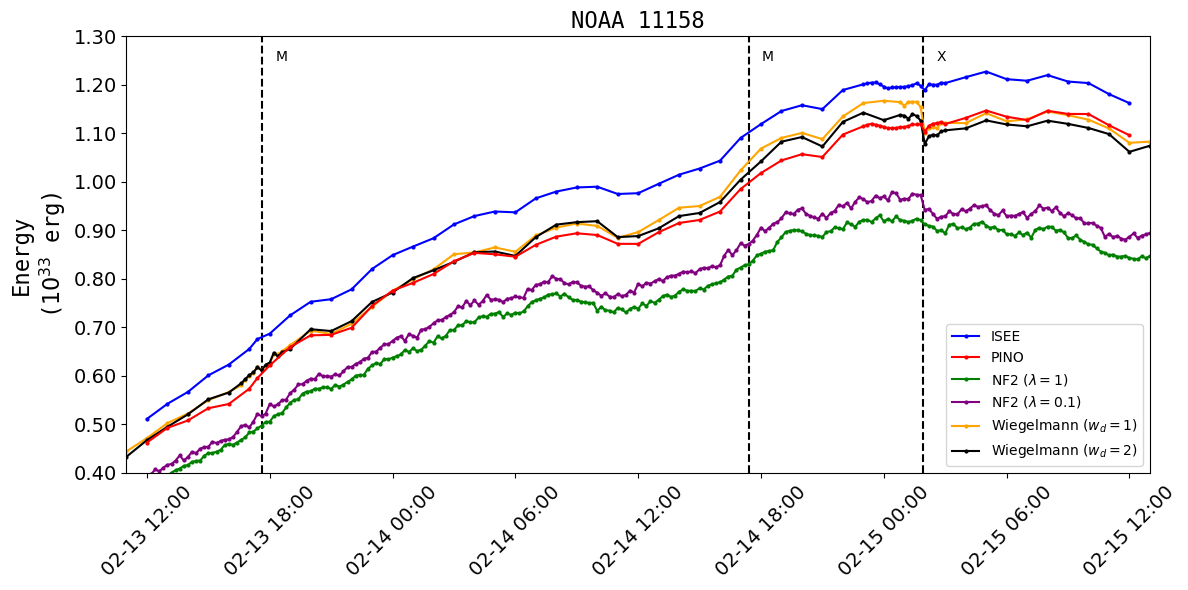

In [33]:
title = "NOAA 11158"
ylim = [0.4, 1.3]

obstime = df['obstime'].apply(pd.to_datetime)
pred_E = df['pred_E_1e33']
ref_E = df['ref_E_1e33']

obstime_lamb_1 = df_lamb_1['obstime'].apply(pd.to_datetime)
pred_E_lamb_1 = df_lamb_1['pred_E_1e33']

obstime_lamb_01 = df_lamb_01['obstime'].apply(pd.to_datetime)
pred_E_lamb_01 = df_lamb_01['pred_E_1e33']

obstime_w1 = df_w1['obstime'].apply(pd.to_datetime)
pred_E_w1 = df_w1['pred_E_1e33']

obstime_w2 = df_w2['obstime'].apply(pd.to_datetime)
pred_E_w2 = df_w2['pred_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=2, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, ref_E,'o', **marker_style, color='blue', label='ISEE', zorder=10)
ax.plot(obstime, pred_E,'o', **marker_style, color='red', label='PINO', zorder=10)
ax.plot(obstime_lamb_1, pred_E_lamb_1,'o', **marker_style, color='green', label='NF2 ($\lambda=1$)')
ax.plot(obstime_lamb_01, pred_E_lamb_01,'o', **marker_style, color='purple', label='NF2 ($\lambda=0.1$)')
ax.plot(obstime_w1, pred_E_w1,'o', **marker_style, color='orange', label='Wiegelmann ($w_d=1$)')
ax.plot(obstime_w2, pred_E_w2,'o', **marker_style, color='black', label='Wiegelmann ($w_d=2$)')

# format the x-axis with universal time
# locator = AutoDateLocator()
# locator.intervald[HOURLY] = [3] # only show every 3 hours
# formatter = DateFormatter('%H')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Energy\n($10^{33}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime_lamb_1[0])}',**text_style)
ax.set_title(f'{title}', **text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 1.25))

# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'energy_nf2_small.png', dpi=600)

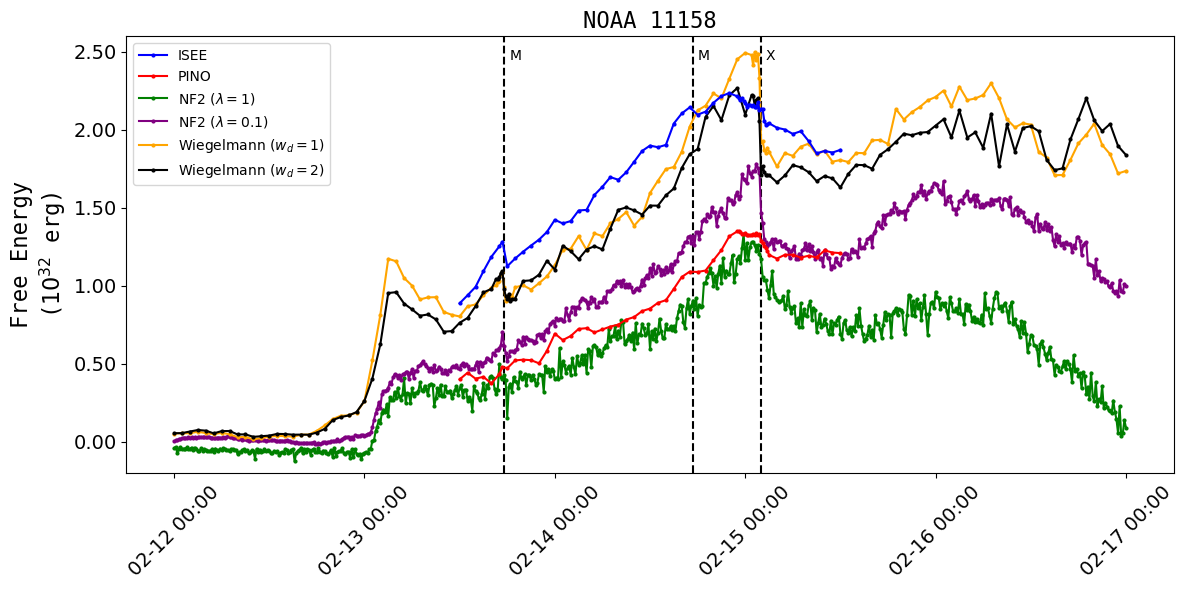

In [35]:
title = "NOAA 11158"
ylim = [-0.2, 2.6]

obstime = df['obstime'].apply(pd.to_datetime)
pot_E = df['pot_E_1e33']
pred_free_E = df['pred_E_1e33'] - pot_E
ref_free_E = df['ref_E_1e33'] - pot_E

obstime_lamb_1 = df_lamb_1['obstime'].apply(pd.to_datetime)
pred_free_E_lamb_1 = df_lamb_1['pred_E_1e33'] - df_lamb_01['pot_E_1e33']

obstime_lamb_01 = df_lamb_01['obstime'].apply(pd.to_datetime)
pred_free_E_lamb_01 = df_lamb_01['pred_E_1e33'] - df_lamb_01['pot_E_1e33']

obstime_w1 = df_w1['obstime'].apply(pd.to_datetime)
pred_free_E_w1 = df_w1['pred_E_1e33'] - df_w1['pot_E_1e33']

obstime_w2 = df_w2['obstime'].apply(pd.to_datetime)
pred_free_E_w2 = df_w2['pred_E_1e33'] - df_w2['pot_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=2, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='ISEE', zorder=10)
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='PINO', zorder=10)
ax.plot(obstime_lamb_1, pred_free_E_lamb_1*10,'o', **marker_style, color='green', label='NF2 ($\lambda=1$)')
ax.plot(obstime_lamb_01, pred_free_E_lamb_01*10,'o', **marker_style, color='purple', label='NF2 ($\lambda=0.1$)')
ax.plot(obstime_w1, pred_free_E_w1*10,'o', **marker_style, color='orange', label='Wiegelmann ($w_d=1$)')
ax.plot(obstime_w2, pred_free_E_w2*10,'o', **marker_style, color='black', label='Wiegelmann ($w_d=2$)')

# format the x-axis with universal time
# locator = AutoDateLocator()
# locator.intervald[HOURLY] = [3] # only show every 3 hours
# formatter = DateFormatter('%H')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime_lamb_1[0])}',**text_style)
ax.set_title(f'{title}', **text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 2.45))
    
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy_nf2.png', dpi=600)

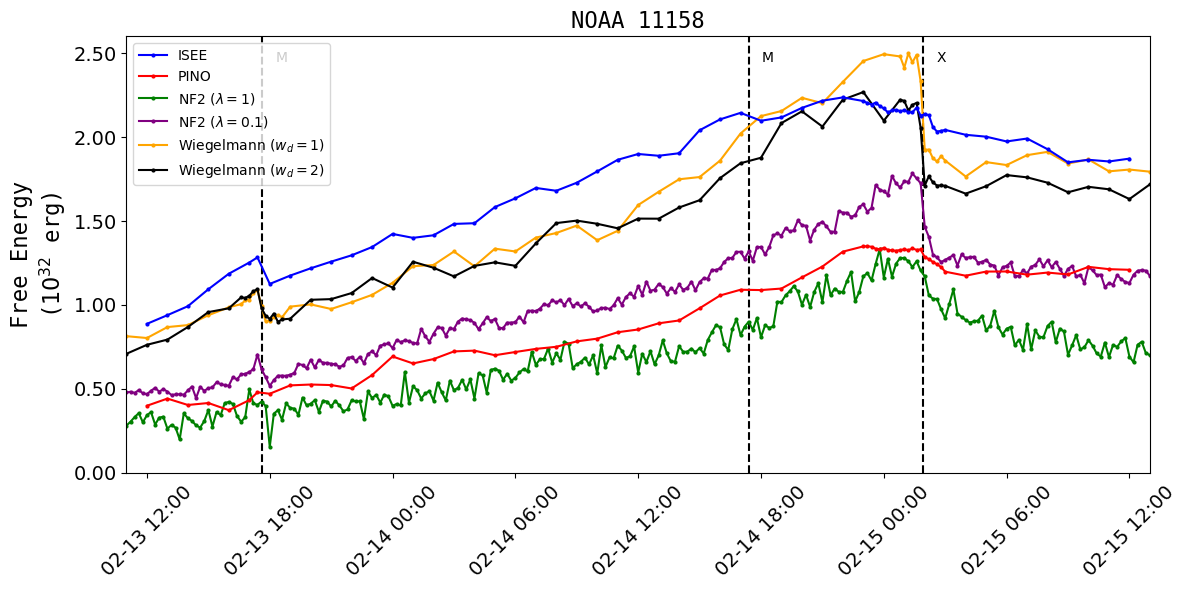

In [36]:
title = "NOAA 11158"
ylim = [0, 2.6]

obstime = df['obstime'].apply(pd.to_datetime)
pot_E = df['pot_E_1e33']
pred_free_E = df['pred_E_1e33'] - pot_E
ref_free_E = df['ref_E_1e33'] - pot_E

obstime_lamb_1 = df_lamb_1['obstime'].apply(pd.to_datetime)
pred_free_E_lamb_1 = df_lamb_1['pred_E_1e33'] - df_lamb_01['pot_E_1e33']

obstime_lamb_01 = df_lamb_01['obstime'].apply(pd.to_datetime)
pred_free_E_lamb_01 = df_lamb_01['pred_E_1e33'] - df_lamb_01['pot_E_1e33']

obstime_w1 = df_w1['obstime'].apply(pd.to_datetime)
pred_free_E_w1 = df_w1['pred_E_1e33'] - df_w1['pot_E_1e33']

obstime_w2 = df_w2['obstime'].apply(pd.to_datetime)
pred_free_E_w2 = df_w2['pred_E_1e33'] - df_w2['pot_E_1e33']

fig, ax = plt.subplots(figsize=(12, 6))

marker_style = dict(linestyle='-', markersize=2, fillstyle='full')
text_style = dict(fontsize=16, fontdict={'family': 'monospace'})
ax.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

# ascribe the data to the axes
ax.plot(obstime, ref_free_E*10,'o', **marker_style, color='blue', label='ISEE', zorder=10)
ax.plot(obstime, pred_free_E*10,'o', **marker_style, color='red', label='PINO', zorder=10)
ax.plot(obstime_lamb_1, pred_free_E_lamb_1*10,'o', **marker_style, color='green', label='NF2 ($\lambda=1$)')
ax.plot(obstime_lamb_01, pred_free_E_lamb_01*10,'o', **marker_style, color='purple', label='NF2 ($\lambda=0.1$)')
ax.plot(obstime_w1, pred_free_E_w1*10,'o', **marker_style, color='orange', label='Wiegelmann ($w_d=1$)')
ax.plot(obstime_w2, pred_free_E_w2*10,'o', **marker_style, color='black', label='Wiegelmann ($w_d=2$)')

# format the x-axis with universal time
# locator = AutoDateLocator()
# locator.intervald[HOURLY] = [3] # only show every 3 hours
# formatter = DateFormatter('%H')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

ax.set_xlim([obstime.iloc[0]-timedelta(minutes=60), obstime.iloc[-1]+timedelta(minutes=60)])

# ax.set_xlabel('time (hour)',**text_style)
ax.set_ylabel('Free Energy\n($10^{32}$ erg)',**text_style)
# ax.set_title(f'{title} / mag energy starting at {str(obstime_lamb_1[0])}',**text_style)
ax.set_title(f'{title}', **text_style)
ax.set_ylim(ylim)

labeltime = timedelta(minutes=30)
for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='--', zorder=0, color='black')
    ax.annotate(cl[0], xy=(et+labeltime, 2.45))
    
# plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(result_path / 'free_energy_nf2_small.png', dpi=600)